In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("4-Algerian_forest_fires_dataset.csv")

In [3]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [4]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [5]:
df.drop(122, inplace=True)

In [6]:
df.shape

(246, 14)

In [7]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [8]:


df.loc[:123, "Region"] = 0
df.loc[123:, "Region"] = 1



In [9]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0


In [10]:
df = df.dropna().reset_index(drop=True)

In [11]:
df.shape

(244, 15)

In [12]:
df.columns = df.columns.str.strip()

In [13]:
df.drop(122, inplace=True)

In [15]:
df[["day", "month", "year", "Temperature", "RH", "Ws"]] = df[["day", "month", "year", "Temperature", "RH", "Ws"]].astype(int)

In [16]:
df[['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']] = df[['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']].astype(float)

In [21]:
df.head()


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0.0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0.0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0.0


In [23]:
df.value_counts(["Classes"])

Classes      
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [25]:
df["Classes"]=np.where(df["Classes"].str.contains("not fire"),0,1)

In [26]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0.0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0.0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0.0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0.0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0.0


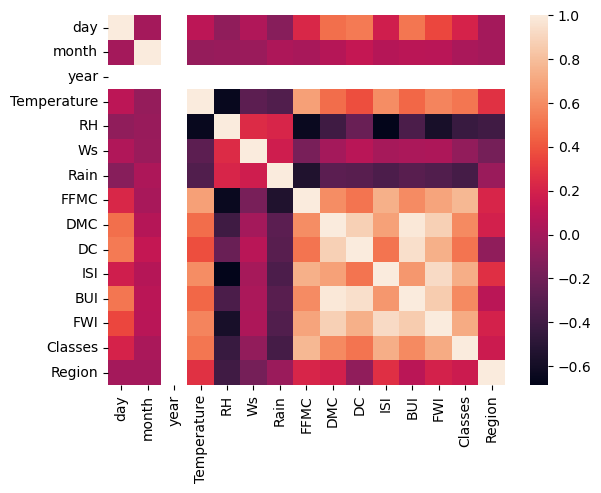

In [27]:
sns.heatmap(df.corr())
plt.show()

In [28]:
df.drop(["day","month","year"],axis=1,inplace=True)

In [29]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0.0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0.0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0.0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0.0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0.0


In [30]:
from sklearn.model_selection import train_test_split

In [33]:
X=df.drop("FWI",axis=1)
y=df["FWI"]

In [36]:
y


0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
239    6.5
240    0.0
241    0.2
242    0.7
243    0.5
Name: FWI, Length: 243, dtype: float64

In [37]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [41]:
def drop_corr_function(df, threshold):
    columns_to_drop = set()
    corr = df.corr()  # compute correlation matrix

    for i in range(len(corr.columns)):
        for j in range(i):  # check only upper triangle (avoid duplicates)
            if abs(corr.iloc[i, j]) > threshold:
                # drop the later column to keep the first one
                columns_to_drop.add(corr.columns[i])

    return columns_to_drop



In [43]:
drop_colums=drop_corr_function(X_train,0.85)

In [47]:
X_train.drop(columns=drop_colums,axis=1,inplace=True)

In [46]:
X_test.drop(columns=drop_colums,axis=1,inplace=True)

In [48]:
X_test.head()



,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,Classes,Region
24,31,64,15,0.0,86.7,14.2,5.7,1,0.0
6,33,54,13,0.0,88.2,9.9,6.4,1,0.0
153,28,58,18,2.2,63.7,3.2,1.2,0,1.0
233,34,58,13,0.2,79.5,18.7,2.1,0,1.0
239,30,65,14,0.0,85.4,16.0,4.5,1,1.0


In [51]:
from sklearn.preprocessing import StandardScaler

In [52]:
scaler=StandardScaler()

In [58]:
X_train_scale=scaler.fit_transform(X_train)
X_test_scale=scaler.transform(X_test)

In [59]:
from sklearn.linear_model import LinearRegression

In [60]:
regression=LinearRegression()

In [62]:
regression.fit(X_train_scale,y_train)

LinearRegression()

In [63]:
regression.coef_

array([-0.03634495, -0.17441065,  0.00703214, -0.04108155, -0.82319823,
        3.6982583 ,  4.84057298,  0.40422124, -0.39259928])

In [64]:
regression.intercept_

np.float64(7.156043956043957)

In [65]:
y_pred=regression.predict(X_test_scale)

In [66]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [68]:
msq=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

In [71]:
print(msq,mae,r2)

0.6742766873791581 0.5468236465249976 0.9847657384266951


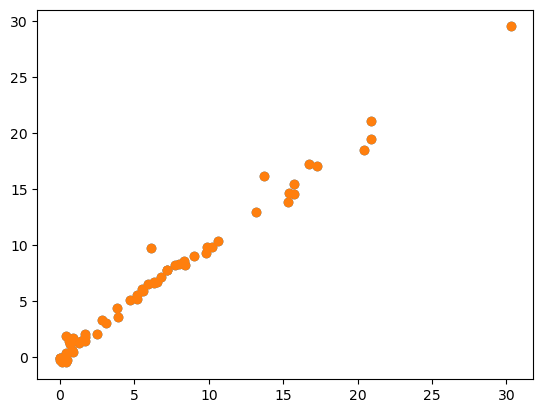

In [80]:
plt.scatter(y_test,y_pred)
plt.show()

In [81]:
from sklearn.linear_model import ElasticNet

In [82]:
elastic=ElasticNet()

In [83]:
elastic.fit(X_train_scale,y_train)

ElasticNet()

In [84]:
elastic.coef_

array([ 0.21700498, -0.46785751,  0.        , -0.        ,  0.37217213,
        2.36758116,  2.35779601,  0.87026661,  0.        ])

In [85]:
elastic.intercept_

np.float64(7.156043956043956)

In [91]:
y_pred_2=elastic.predict(X_test_scale)

In [92]:
msq=mean_squared_error(y_test,y_pred_2)
mae=mean_absolute_error(y_test,y_pred_2)
r2=r2_score(y_test,y_pred_2)

In [93]:
print(msq,mae,r2)

5.517251101025224 1.8822353634896 0.8753460589519703


In [94]:
from sklearn.linear_model import ElasticNetCV

In [96]:
elastic_cv=ElasticNetCV()

In [98]:
elastic_cv.fit(X_train_scale,y_train)

ElasticNetCV()

In [99]:
elastic_cv.coef_

array([-0.        , -0.19081149,  0.05486916, -0.        , -0.50794865,
        3.59828374,  4.50431349,  0.41864659, -0.32815292])

In [100]:
elastic_cv.intercept_

np.float64(7.156043956043957)

In [101]:
y_pred_3=elastic_cv.predict(X_test_scale)

In [102]:
mae=mean_absolute_error(y_test,y_pred_3)
msq=mean_squared_error(y_test,y_pred_3)
r2=r2_score(y_test,y_pred_3)
print(mae,msq,r2)

0.6575946731430904 0.8222830416276272 0.9814217587854941
